<a href="https://colab.research.google.com/github/ria-dharmani/Restaurant-Review-Analysis/blob/main/nlp_mini_project_restaurant_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [ ]:
%cd /content/drive/My Drive/Kaggle


/content/drive/My Drive/Kaggle


In [ ]:
#!kaggle datasets download -d yelp-dataset/yelp-dataset

In [ ]:
%ls

Dataset_User_Agreement.pdf  yelp_academic_dataset_business.json
kaggle.json                 yelp_academic_dataset_checkin.json
Negative_Reviews.png        yelp_academic_dataset_review.json
negative_words.csv          yelp_academic_dataset_tip.json
Positive_Reviews.png        yelp_academic_dataset_user.json
positive_words.csv


In [ ]:
!pip install plotly_express
!pip install stylecloud
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sys
pd.set_option('display.max_columns', 50)

# Import Plotly Packages
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px
from plotly.offline import init_notebook_mode, plot, iplot


## sklearn Packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Import NLP Packages
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import stylecloud

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import matplotlib.colors as mcolors

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
#!pip install plotly-express
#!pip install stylecloud

In [ ]:
import pandas as pd
business_df = pd.read_csv('https://raw.githubusercontent.com/thomasnilsson/02805-social-graphs-2018/master/project1/toronto/toronto_biz.csv')
business_df.head(10)

,Unnamed: 0,business_id,city,latitude,longitude,name,postal_code,review_count,stars,state,ev
0,0,9A2quhZLyWk0akUetBd8hQ,toronto,43.664378,-79.414424,Bnc Cake House,M6G 1K8,7,4.0,ON,0.002171
1,1,tZnSodhPwNr4bzrwJ1CSbw,toronto,43.664125,-79.411886,Southern Accent Restaurant,M6G 2L7,146,4.0,ON,0.013559
2,2,5J3b7j3Fzo9ISjChmoUoUA,toronto,43.681328,-79.427884,Mabel's Bakery,M6C 1B5,23,4.0,ON,0.001386
3,3,PMDlKLd0Mxj0ngCpuUmE5Q,toronto,43.670885,-79.392379,The Coffee Mill Restaurant,M5R 3K5,25,3.5,ON,0.002031
4,4,YIez_A3WOt9J2SXN7OMa2Q,toronto,43.745928,-79.324623,Allwyn's Bakery,M3A 1K8,105,4.0,ON,0.005256
5,5,xuUzASHWjRJRFv6Ck5pO7g,toronto,43.649972,-79.383223,Fornetti,M5H 3V1,3,3.5,ON,0.000500
6,6,mr3rQcYBKWu2L6o7qtQ9Wg,toronto,43.669116,-79.426021,Hub Coffee House & Locavorium,M6G 3N2,31,4.0,ON,0.004121
7,7,Q_cfbLdAxkLiEZW5TO5T6A,toronto,43.595149,-79.529977,More Than Pies Baking,M8W 1N2,9,4.0,ON,0.000222
8,8,cuXCQM-9VwpZlSneEY1b3w,toronto,43.708002,-79.375814,Indian Street Food Company,M4G 3C1,51,3.5,ON,0.003875
9,9,hsWx7ya8jLMhi8ZWX23Thg,toronto,43.706983,-79.396499,Harvey's Restaurants,M4P 1G6,5,2.0,ON,0.000163


In [ ]:
# Reading in Restaurant Businesses Final CSV File

#business_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(business_df.shape)
business_df.head(3)

(9678, 11)


,Unnamed: 0,business_id,city,latitude,longitude,name,postal_code,review_count,stars,state,ev
0,0,9A2quhZLyWk0akUetBd8hQ,toronto,43.664378,-79.414424,Bnc Cake House,M6G 1K8,7,4.0,ON,0.002171
1,1,tZnSodhPwNr4bzrwJ1CSbw,toronto,43.664125,-79.411886,Southern Accent Restaurant,M6G 2L7,146,4.0,ON,0.013559
2,2,5J3b7j3Fzo9ISjChmoUoUA,toronto,43.681328,-79.427884,Mabel's Bakery,M6C 1B5,23,4.0,ON,0.001386


In [ ]:
review_df_1 = pd.read_csv('https://raw.githubusercontent.com/thomasnilsson/02805-social-graphs-2018/master/project1/toronto/toronto_reviews_1.csv')

review_df_1.drop(['Unnamed: 0'], axis=1, inplace = True)
#Drop key column as it contains the same values in the user_id column
#review_df_1.drop(['key'], axis=1, inplace = True) 
print(review_df_1.shape)
review_df_1.head(3)

(95000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA


In [ ]:
user_df = pd.read_csv('https://raw.githubusercontent.com/thomasnilsson/02805-social-graphs-2018/master/project1/toronto/toronto_users.csv')
user_df.head(10)

user_df.drop(['Unnamed: 0'], axis=1, inplace = True)
print(user_df.shape)
user_df.head(3)

(84624, 9)


,average_stars,elite,friends,name,review_count,useful,user_id,yelping_since,ev
0,2.0,None,None,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28,0.000012
1,1.0,None,None,Ying,1,0,bwPVGW1Mx0qmS_qNQ7xmYg,2012-02-09,0.000065
2,3.5,None,None,Vai,4,0,JcKUiHAQ9cWGSO_qFbzlKw,2009-12-28,0.001124


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Number of Restaurants')

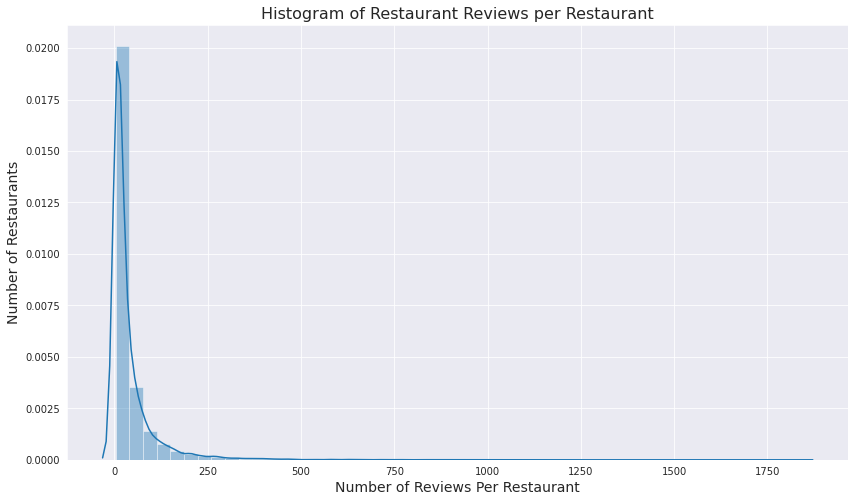

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(business_df['review_count'])
plt.title('Histogram of Restaurant Reviews per Restaurant', fontsize = 16)
plt.xlabel('Number of Reviews Per Restaurant', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)

In [ ]:
review_df_1['text'].head()

0    Sansotei serves some top notch ramen. They tak...
1    Non-existened service!  The waiter did not eve...
2    It might be a bit unfair to review Globe so ea...
3    I have been itching to get to Origin for month...
4    Away from the hubbub of the Annex and Little K...
Name: text, dtype: object

In [ ]:
one_star_reviews = review_df_1[review_df_1['stars'] == 1.0]
two_star_reviews = review_df_1[review_df_1['stars'] == 2.0]
negative_reviews = [one_star_reviews, two_star_reviews]
negative_reviews = pd.concat(negative_reviews)
print(negative_reviews.shape)
negative_reviews.sample(5)

(22590, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
31240,jCpB1D_Hsc_dlF0ErNO-7w,1,2016-04-18,0,40kUFyLT4R9i_dPcHzci5w,1,It's isn't often that I'm completely dissatisf...,1,xVSjIOYjBiNywVuKffY6ow
59922,kaW97gZXyGMdkedZNdQuew,0,2017-07-17,0,n2XW7LdnV_KU8IZcdt98HQ,1,Very unimpressed with this place and not sure ...,0,WU77DECNM1G9xoPoEIT2Vg
51401,cUxsG0rgpE18dMyvyw8Gdg,0,2017-03-05,0,dF8wftvqPdrWSeHBXOSRUg,2,Food wasn't great. It was cold and chicken was...,1,KOvZDStqszep4V_umDDWmA
45679,wcR9Vbwn2EmlSeV7uBUIsA,0,2011-04-16,1,CUB2UyLwg8LVI5zB246qpA,2,"The waitress, Victoria, was extremely affectio...",1,VgIWJINV57JVFTFyd5qy0A
72685,-2EAyppKR_2xuLyvJZEbRQ,0,2014-11-07,1,2xAJip5yxjhmUpGWn334_w,2,"Compared to Fat Bastard, this place was not t...",1,_M8jhtqmgd-oRapXbzhYoQ


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



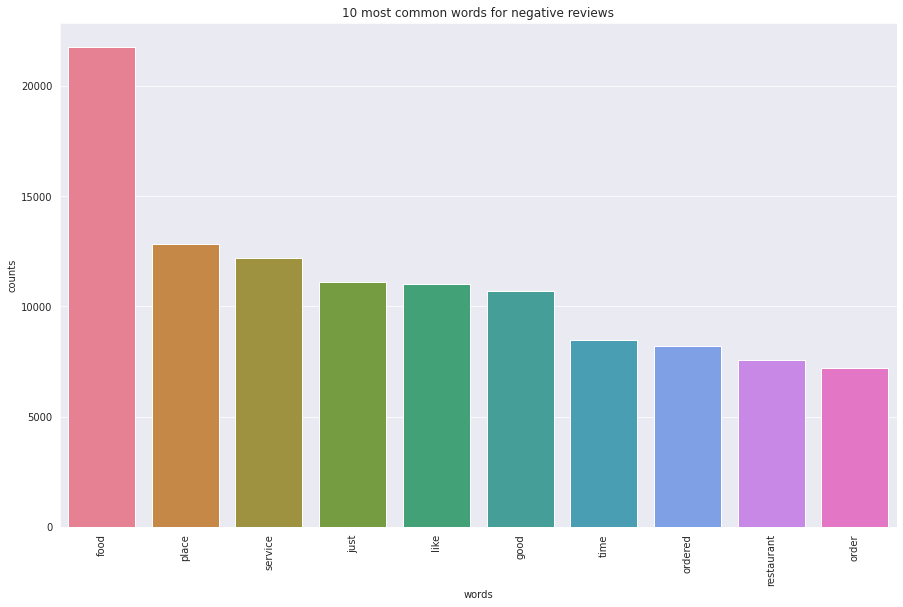

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words for negative reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(negative_reviews['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"

stopwords = set(stopwords.words('english'))
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(negative_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(negative_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(150)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good'], inplace = True)
negative_top.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,service,one,us,would,time,ordered,back,get,order,go,even,really,came,got,table,chicken,never,went,asked,better,also,much,said,bad,minutes,...,quite,water,drink,friends,beef,dishes,money,new,definitely,actually,maybe,worth,toronto,waiting,manager,enough,looked,tables,pay,fish,hour,special,next,hot,waited
0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,4,5,2,0,2,0,1,0,0,0,1,0,0,4,1,0,0,1,4,2,1,0,1,0,...,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,5,0,1,0,0,2,0,0,0,1,0,0,2,0,1,1,0,0,1,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


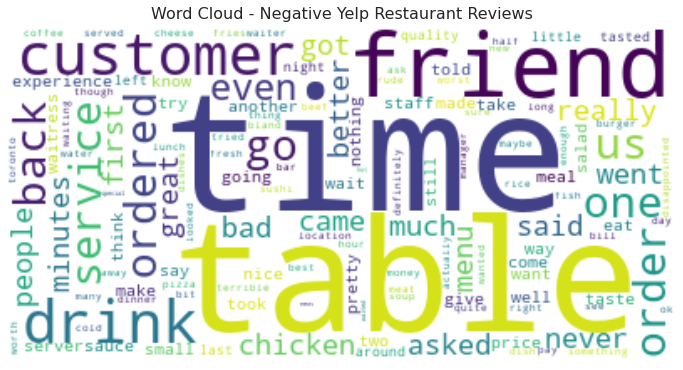

In [ ]:
# Generate Word Cloud

wordcloud_low = WordCloud(background_color="white").generate(' '.join(negative_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Word Cloud - Negative Yelp Restaurant Reviews', fontsize=16, y=1.01)
plt.axis("off");

In [ ]:
negative_reviews['counter'] = 1
negative_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,counter
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,1
13,ioEdisf6TTCoUbfQDnUCjA,0,2011-02-27,1,jz8200YeNwsIqa2yImVO_g,1,One of the worst bar experiences I've ever had...,1,YHWsLBS8jzZiPjKHMFOaAA,1
14,KuIxm6FVNmlvpssWJi9-bA,1,2010-11-19,2,UvJkZ8bvLj9iuerrawgoQg,1,I know some people are going to completely dis...,5,YHWsLBS8jzZiPjKHMFOaAA,1
22,uF86ZhygpBEGr3CudNemYA,1,2011-03-17,3,YCilP6BtVj-3Pjq3uTXVwA,1,"For those that don't know, O.Noir is that uniq...",15,YHWsLBS8jzZiPjKHMFOaAA,1
32,nWD8OWd_DAXGubGpFenmiw,1,2011-08-28,0,-NFqTYMVwBYNEL8Q9dGVSA,1,Meh. You'd think that there wouldn't be much t...,3,YHWsLBS8jzZiPjKHMFOaAA,1


In [ ]:

# Sorting Restaurants based on number of reviews

negative_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
zgQHtqX0gqMw1nlBZl2VnQ    79
a8pmtlVKf7NiSLI-4KejIw    61
-av1lZI1JDY_RZN2eTMnWg    57
jluEI1ZDQDeJlbl-M3YH3Q    52
8I5U8OQ06nSxX2y4PPOWzQ    45
                          ..
GD99qIgZ-QeIY4thevw9Iw     1
WlINkrwGmUzyR-hoG-pIlw     1
GEvolb_U74NXgfgdxrVtyQ     1
GFhlhdFYjuW47z192L3Qbg     1
zzvlwkcNR1CCqOPXwuvz2A     1
Name: counter, Length: 5707, dtype: int64

In [ ]:
# Restaurant with most negative reviews

worst_restaurant = business_df[business_df['business_id'] == 'zgQHtqX0gqMw1nlBZl2VnQ']
worst_restaurant

,Unnamed: 0,business_id,city,latitude,longitude,name,postal_code,review_count,stars,state,ev
9040,9040,zgQHtqX0gqMw1nlBZl2VnQ,toronto,43.649678,-79.386275,Momofuku Noodle Bar,M5H 0A3,832,3.0,ON,0.053623


In [ ]:
# Filtering Reviews from the Worst Restaurant

worst_restaurant_reviews = negative_reviews[negative_reviews['business_id'] == 'zgQHtqX0gqMw1nlBZl2VnQ']
worst_restaurant_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,counter
1227,zgQHtqX0gqMw1nlBZl2VnQ,0,2015-01-01,0,mMMWBCJtI1BpQO7zyevrCQ,1,If you love instant ramen you may like this pl...,2,EL8geY5yvwxyX-agrdkfDw,1
1941,zgQHtqX0gqMw1nlBZl2VnQ,0,2013-08-22,0,dpQTUbDM5A_ROqwP-gN9fg,1,I've heard all the buzz about this place and w...,1,G3HRo2raYhyzh2jsR5LQwQ,1
2054,zgQHtqX0gqMw1nlBZl2VnQ,1,2014-07-25,0,8AzQOhzCmtbENkNX2lBxAQ,1,The pork buns were good. The noodle we ordere...,1,C6tXYpamAGbhowKJx5ptJQ,1
6922,zgQHtqX0gqMw1nlBZl2VnQ,0,2016-06-13,0,6o2yrdUK5MqfXUFQ8tJuJA,1,"Food ok, service is becoming worse than before...",0,p0yISSHyPR3L4ZpyrdDYlg,1
12882,zgQHtqX0gqMw1nlBZl2VnQ,0,2014-12-14,0,LwLB7MXfh-IeqxwXr-KQ1A,1,THEY SERVE THE WORST RAMEN EVER!!!! Do not rec...,0,cinpFCBQm6IP55mZjiKiKw,1
...,...,...,...,...,...,...,...,...,...,...
85837,zgQHtqX0gqMw1nlBZl2VnQ,0,2013-11-04,0,OW6OuvEQ0bnIpVYwxMRsuA,2,Meh. It's a pretentious restaurant with sleek ...,2,9vuapSgh4dbcWsfUYkULrA,1
87303,zgQHtqX0gqMw1nlBZl2VnQ,0,2016-05-19,0,tPEwujAEhGa6wLyIBp3leQ,2,Tried Daisho and the noodle bar... I was prett...,0,ur_T4YKoe_HbxsMy82bdxQ,1
90551,zgQHtqX0gqMw1nlBZl2VnQ,0,2015-08-30,0,x8oJal0FjUQDcN7UA7CpHw,2,"To be fair, their noodles are great. However, ...",0,Q0iMqM6OccCjLVnvcn_QKg,1
92330,zgQHtqX0gqMw1nlBZl2VnQ,0,2014-03-10,0,j1xct1-EyXm6v2yeHybQuw,2,I had heard some great things about Momofuku a...,2,AwLKtvbFVEMLnWr6WekHTg,1


In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)
cvec.fit(worst_restaurant_reviews['text'])

# Transforming using our fitted cvec and converting the result to a DataFrame

negative_words = pd.DataFrame(cvec.transform(worst_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

negative_top = negative_words.sum(axis = 0).sort_values(ascending = False).head(300)
negative_pd = pd.DataFrame(data=negative_top)
negative_top = negative_words[negative_pd.index]
negative_top.drop(columns=['food','like', 'restaurant', 'place', 'good', 'better', 'great','noodles', 'ramen', 'pork', 'chicken', 'noodle', 'momofuku','nice','bar', 'broth', 'really', 'much','one','belly','bun', 'buns','even', 'us', 'got', 'go', 'came','milk'], inplace = True)
negative_top.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,service,time,ordered,would,get,back,bowl,soup,told,try,think,definitely,toronto,rice,order,egg,experience,wait,eat,two,taste,also,bit,tried,table,...,beer,shangri,rich,authentic,side,salt,bao,bowls,recommend,enjoy,pricey,door,atmosphere,chinese,prices,compared,slightly,smoked,thanks,texture,customer,higher,talking,rude,else
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,2,1,0,2,0,0,1,2,1,1,1,0,0,1,0,4,0,0,0,1,0,0,...,0,0,0,0,1,2,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,3,2,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
column_list = list(negative_top)
negative_words = negative_top[column_list].sum(axis=0)
negative_words = negative_words.to_frame(name = 'sum').reset_index()
negative_words.set_index('index',inplace = True)
negative_words.to_csv("negative_words.csv")

In [ ]:
negative_words.shape

(272, 1)

In [ ]:
thumbs_down = stylecloud.gen_stylecloud(file_path="negative_words.csv", 
                                        icon_name = "fas fa-thumbs-down",
                                        size = 550,
                                        palette="colorbrewer.sequential.RdPu_3", 
                                        background_color="white",
                                        output_name = 'Negative_Reviews.png')

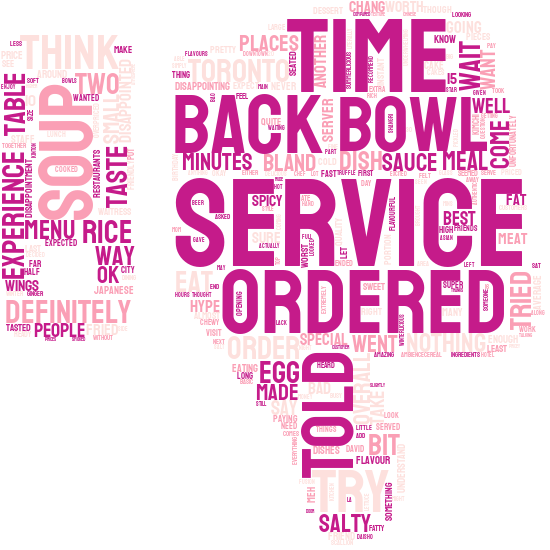

In [ ]:
from IPython.display import Image
Image(filename='Negative_Reviews.png')

Positive Reviews

In [ ]:
# Filtering for positive reviews (five star)

positive_reviews = review_df_1[review_df_1['stars'] == 5.0]
print(positive_reviews.shape)
positive_reviews.sample(5)

(29910, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
41484,gy5pr5bFAjOL5rERSdMCLg,0,2016-12-02,0,4EckbaigQFs8J8Mq5Ylq8w,5,"From Dallas, TX here on business.. this place ...",0,LgZLRSLHNun2Y_oLDRZWlA
44681,abO4gvGKB0aVjsrXHlgeFg,0,2017-05-22,0,q1UMYh9rRPqMq-2SoutaEQ,5,I had been considering a visit to this restaur...,3,8XWdwHnuxD6LwmxNSdGurg
55763,AUZiuQpqFER4vt3aku99eA,0,2013-07-28,0,FdsfCGi6QvN8EgfuN1Dnng,5,Their gelato is amazing! It taste great and no...,0,mTuRMYoJwIWXRs6KGUPzIg
17622,pSMK_FtULKiU-iuh7SMKwg,0,2016-05-30,0,hoGgBjCz5jtghG9XnzGG6w,5,"Excellent pizza, unlimited topping, quality to...",0,B0VPjnFjhadwn3IF6cAEfg
81688,ufwkkMd9yr9cFU1R5ONArg,0,2017-03-16,0,MgMjVTYuOnrZmm04hqLWVw,5,I used to live literally a less than 10 minute...,0,S7Cs1wTBkkim20OinXDy4A


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



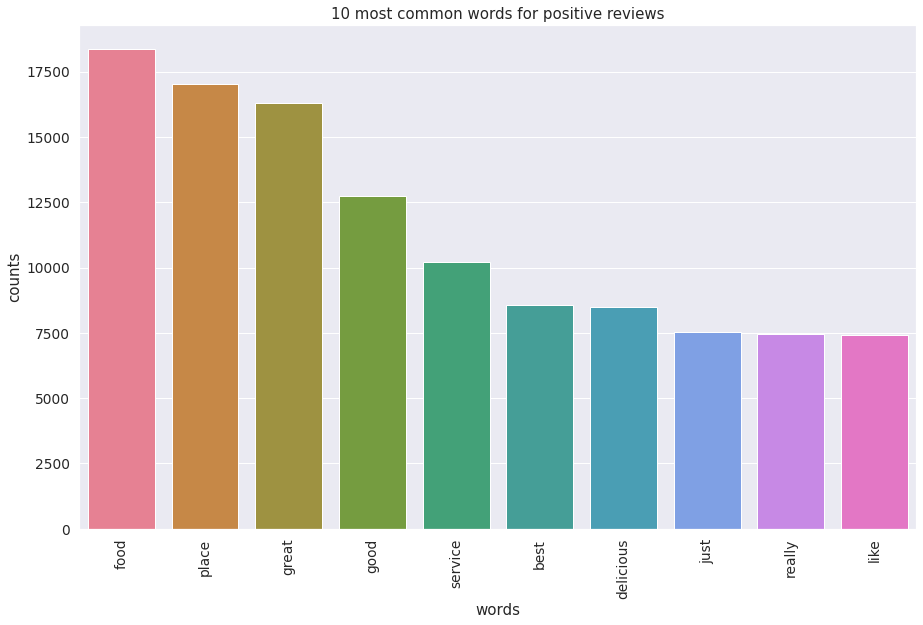

In [ ]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words for positive reviews')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

## Sentiment Analysis for high rated reviews
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(positive_reviews['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)

cvec.fit(positive_reviews['text'])

positive_words = pd.DataFrame(cvec.transform(positive_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(100)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really'], inplace = True)
positive_top.head()

TypeError: ignored

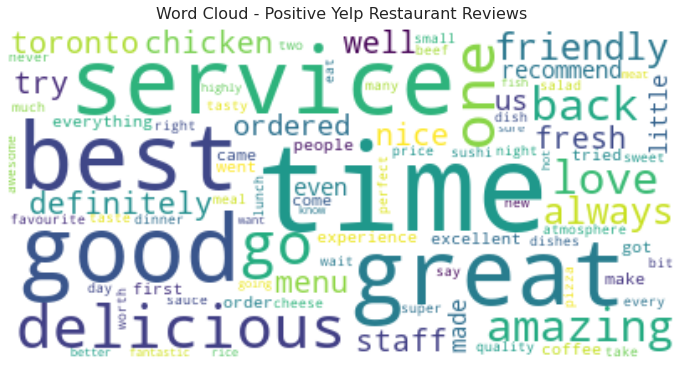

In [ ]:
# Generate Word Cloud

wordcloud_high = WordCloud(background_color="white").generate(' '.join(positive_top))
plt.figure(figsize = (12,10))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud - Positive Yelp Restaurant Reviews', fontsize=16, y=1.01)
plt.axis("off");

In [ ]:
positive_reviews['counter'] = 1
positive_reviews.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,business_id,cool,date,funny,review_id,stars,text,useful,user_id,counter
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,1
11,wVc3g-YfyDvkOLDecpr4DA,0,2012-03-16,0,RCTkfcQKczfUhtV1Hz58jA,5,5 Doors North is my neighbourhood spot. I have...,7,YHWsLBS8jzZiPjKHMFOaAA,1
25,-chGaXHZsoLKLHPJMMsdmw,2,2011-08-05,0,8Jw4NUzEWzHnNu4-Z2QRiA,5,Utopia Cafe and Grill is aptly named. Let me t...,3,YHWsLBS8jzZiPjKHMFOaAA,1
26,AercPW1B2YVNK3UsiPDkTg,0,2012-07-27,0,R3vvcOvLY2q0FhAlzLQqhg,5,"Beautifully modern and discerning, Nota Bene p...",0,YHWsLBS8jzZiPjKHMFOaAA,1
34,zz3CqZhNx2rQ_Yp6zHze-A,1,2011-03-12,1,zNu5ytMhNJ9N70AF04X9rg,5,I am in love...\n\nHow do I know? I paid $22 f...,3,YHWsLBS8jzZiPjKHMFOaAA,1


In [ ]:
# Sorting Restaurants Based on Most Reviews

positive_reviews.groupby('business_id')['counter'].sum().sort_values(ascending = False)

business_id
r_BrIgzYcwo1NAuG9dLbpg    181
aLcFhMe6DDJ430zelCpd2A    157
RtUvSWO_UZ8V3Wpj0n077w    142
iGEvDk6hsizigmXhDKs2Vg    126
N93EYZy9R0sdlEvubu94ig    119
                         ... 
niKwlIH1RUMUkEGNhkWUTg      1
LkgqiRF3LaZCVQmDFC0AaA      1
LjZ_JdhxSzzCdTqisU_Law      1
nkTiiS4qTb9INNOWVvystw      1
zzvlwkcNR1CCqOPXwuvz2A      1
Name: counter, Length: 5815, dtype: int64

In [ ]:
# Restaurant with most positive reviews

best_restaurant = business_df[business_df['business_id'] == 'r_BrIgzYcwo1NAuG9dLbpg']
best_restaurant

,Unnamed: 0,business_id,city,latitude,longitude,name,postal_code,review_count,stars,state,ev
3598,3598,r_BrIgzYcwo1NAuG9dLbpg,toronto,43.647866,-79.388642,Pai Northern Thai Kitchen,M5H 3G8,1837,4.5,ON,0.166055


In [ ]:
best_restaurant_reviews = positive_reviews[positive_reviews['business_id'] == 'r_BrIgzYcwo1NAuG9dLbpg']
best_restaurant_reviews

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,counter
157,r_BrIgzYcwo1NAuG9dLbpg,0,2015-11-08,0,xYd_ZaAxJ5yMCcn18suCtg,5,I was on the phone trying to order with Khao S...,0,kBNFdviedCPFWyR-wVaAzw,1
830,r_BrIgzYcwo1NAuG9dLbpg,0,2016-08-29,0,-gL10Yxv5G9al04jTGANCQ,5,This has to be my favourite Thai restaurant. T...,0,o6r0hORdfnXM2Yruu8GKLQ,1
1467,r_BrIgzYcwo1NAuG9dLbpg,0,2017-10-19,0,92NLv5Q3JRnH6FqqCqJngQ,5,Everything I've had here is delicious. Do not ...,0,xaDosW8Dh5p29xmf35WJ4g,1
1931,r_BrIgzYcwo1NAuG9dLbpg,1,2017-10-12,0,sxewP9OUGcgEAnhYyq0FMw,5,There was a long line to put in our name on th...,0,14YnvoXaFaFtz_eLKBKOOg,1
3004,r_BrIgzYcwo1NAuG9dLbpg,0,2016-12-04,0,bGCMX-kNiD1LUbhvTJ98FA,5,Food: 5/5\nAtmosphere: 5/5\nService: 4.5/5\n\n...,0,RiQb2TgxXl5POGqB2faAkQ,1
...,...,...,...,...,...,...,...,...,...,...
92892,r_BrIgzYcwo1NAuG9dLbpg,1,2018-03-16,1,kWZhwqF-GCwAnqKPuFdvcQ,5,probably THE best thai place in Toronto (this ...,1,-rw9_TTO1XN4qD6-ex8yCw,1
93842,r_BrIgzYcwo1NAuG9dLbpg,0,2017-11-07,0,PixeiZ9y-cJxUFIbpjHG-g,5,Amazing authentic northern Thai food. If you g...,0,LFz6rJscGn0E2w_Fv1qlyQ,1
93869,r_BrIgzYcwo1NAuG9dLbpg,0,2017-12-29,0,WWYsFmTkLAa6SueEGjpe1w,5,My first time here from the US. This place is ...,2,oODU4F5_56A0E_8di0ItGg,1
94131,r_BrIgzYcwo1NAuG9dLbpg,0,2015-08-04,0,kLf7arVS9PURd-a1iHZMgg,5,Amazing food! I would recommend people to come...,0,FmD9Umf0CQVprvL2H88Xkg,1


In [ ]:
# Let's use the stop_words argument to remove words like "and, the, a"
stopwords = set(stopwords.words('english'))
cvec = CountVectorizer(min_df = 2, stop_words= stopwords, max_features = 1000)

cvec.fit(best_restaurant_reviews['text'])

positive_words = pd.DataFrame(cvec.transform(best_restaurant_reviews['text']).todense(),
                       columns=cvec.get_feature_names())

positive_top = positive_words.sum(axis = 0).sort_values(ascending = False).head(300)
positive_pd = pd.DataFrame(data=positive_top)
positive_top = positive_words[positive_pd.index]
positive_top.drop(columns=['food','like', 'restaurant', 'place', 'really', 'thai', 'pad', 'pai', 'khao'], inplace = True)
positive_top.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,great,curry,good,service,go,wait,best,definitely,delicious,beef,one,toronto,soi,love,time,get,rice,amazing,back,make,try,atmosphere,dish,soup,coconut,...,basil,ambiance,within,list,stop,although,quite,bartenders,mains,mai,anything,big,appetizers,medium,leave,actually,know,liked,live,waitress,king,okay,warm,knew,ask
0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
2,0,1,0,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,1,2,1,0,0,2,1,0,2,1,1,1,1,2,2,0,1,1,1,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
column_list = list(positive_top)
positive_words = positive_top[column_list].sum(axis=0)
positive_words = positive_words.to_frame(name = 'sum').reset_index()
positive_words.set_index('index',inplace = True)
positive_words.to_csv("positive_words.csv")

In [ ]:
thumbs_up = stylecloud.gen_stylecloud(file_path="positive_words.csv", 
                                        icon_name = "fas fa-thumbs-up",
                                        size = 550,
                                        palette="colorbrewer.sequential.Greens_5", 
                                        background_color="white",
                                        output_name = 'Positive_Reviews.png')

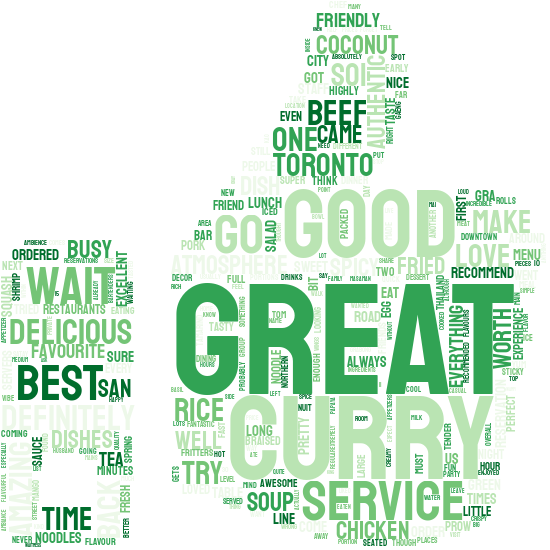

In [ ]:
Image(filename='Positive_Reviews.png')

Creating new feature columns

In [ ]:
review_df_1.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA


In [ ]:
## Creating new feature columns
# Calculate reviews word count

review_df_1['word_count'] = review_df_1['text'].apply(lambda x: len(str(x).split(" ")))

# Calculate reviews character count

review_df_1['char_count'] = review_df_1['text'].str.len()

# Calculate average review length

def avg_word(review):
  words = review.split()
  return (sum(len(word) for word in words) / len(words))

review_df_1['avg_word_len'] = review_df_1['text'].apply(lambda x: avg_word(x))

# Calculate number of stop words in reviews

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
review_df_1['stopword_count'] = review_df_1['text'].apply(lambda x: len([x for x in x.split() if x in stopwords]))

review_df_1.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,96,540,4.635417,34
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,89,487,4.586207,34
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA,628,3662,4.768139,242
3,iKMLsX1Je7P3wAOEc9scDg,0,2011-11-07,0,D2TcNaPqXxDGQ6T0n-vHXw,4,I have been itching to get to Origin for month...,4,YHWsLBS8jzZiPjKHMFOaAA,812,4596,4.588307,347
4,gl1zQmiA8MUHmLL2wsCdVA,1,2011-01-10,0,ZOBEhxOeMnncqIJFkGumRA,3,Away from the hubbub of the Annex and Little K...,2,YHWsLBS8jzZiPjKHMFOaAA,569,3274,4.650519,245


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Reviews')

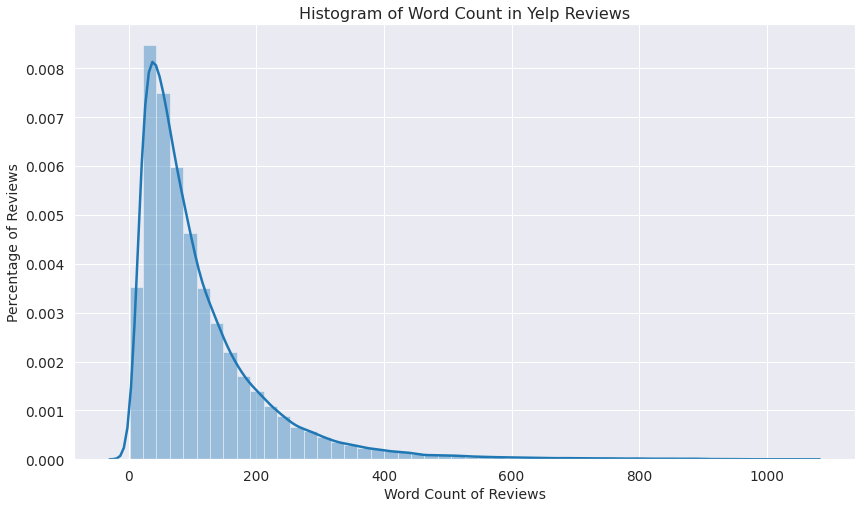

In [ ]:

# Histogram of Word Count 

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(review_df_1['word_count'])
plt.title('Histogram of Word Count in Yelp Reviews', fontsize = 16)
plt.xlabel('Word Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Reviews')

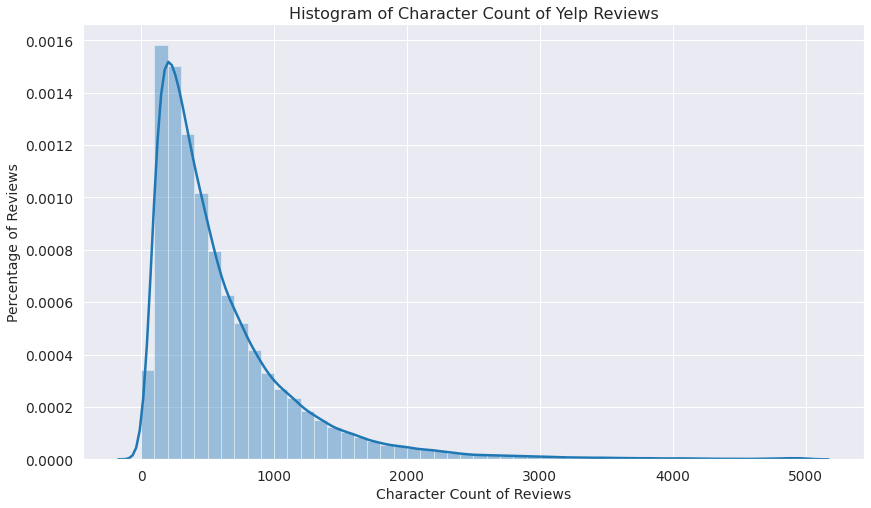

In [ ]:
# Histogram of Character Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(review_df_1['char_count'])
plt.title('Histogram of Character Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Character Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Reviews', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

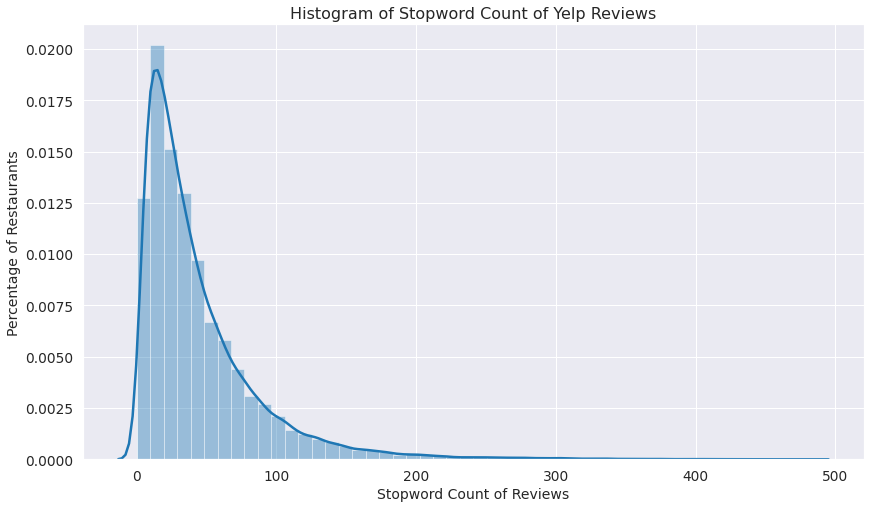

In [ ]:
# Histogram of Stopword Count of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(review_df_1['stopword_count'])
plt.title('Histogram of Stopword Count of Yelp Reviews', fontsize = 16)
plt.xlabel('Stopword Count of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

In [ ]:
# Average Word Length of Review for different Stars/Ratings
review_df_1.groupby('stars')['word_count'].mean()

stars
1    133.419131
2    134.537288
3    127.232685
4    108.584304
5     87.698195
Name: word_count, dtype: float64

In [ ]:
stars_wordcount = review_df_1.groupby('stars')['word_count'].mean()
stars_wordcount = stars_wordcount.to_frame(name = 'sum').reset_index()
stars_wordcount

,stars,sum
0,1,133.419131
1,2,134.537288
2,3,127.232685
3,4,108.584304
4,5,87.698195


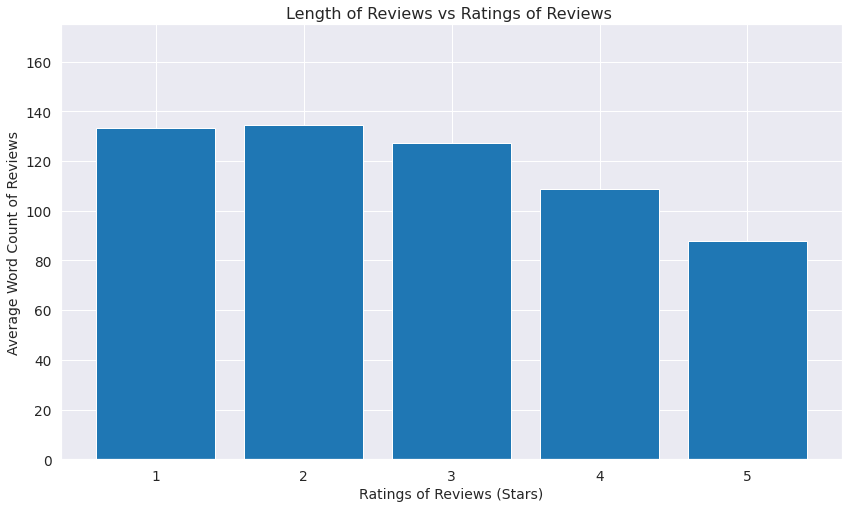

In [ ]:

# Distribution of Length of Reviews vs Ratings of Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
plt.bar(stars_wordcount['stars'],stars_wordcount['sum'])
plt.title('Length of Reviews vs Ratings of Reviews ', fontsize = 16)
plt.xlabel('Ratings of Reviews (Stars)', fontsize=14)
plt.ylabel('Average Word Count of Reviews', fontsize=14)
plt.ylim((0,175))
plt.show()

Text processing

In [ ]:

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Import Textblob

from textblob import Word

# Splitting up words in reviews

review_df_1['cleaned_text'] = review_df_1['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation

review_df_1['cleaned_text'] = review_df_1['cleaned_text'].str.replace('[^\w\s]', '')

# Remove Stopwords

from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
review_df_1['cleaned_text'] = review_df_1['cleaned_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

# Lemmatizing cleaned text

review_df_1['cleaned_text'] = review_df_1['cleaned_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
review_df_1.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,96,540,4.635417,34,sansotei serf top notch ramen take reservation...
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,89,487,4.586207,34,nonexistened service waiter even great u liste...
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA,628,3662,4.768139,242,might bit unfair review globe early existence ...
3,iKMLsX1Je7P3wAOEc9scDg,0,2011-11-07,0,D2TcNaPqXxDGQ6T0n-vHXw,4,I have been itching to get to Origin for month...,4,YHWsLBS8jzZiPjKHMFOaAA,812,4596,4.588307,347,itching get origin month friend mine gone rave...
4,gl1zQmiA8MUHmLL2wsCdVA,1,2011-01-10,0,ZOBEhxOeMnncqIJFkGumRA,3,Away from the hubbub of the Annex and Little K...,2,YHWsLBS8jzZiPjKHMFOaAA,569,3274,4.650519,245,away hubbub annex little korea sushi joint bec...


In [ ]:
# Calculate polarity and subjectivity score

from textblob import TextBlob

review_df_1['polarity'] = review_df_1['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[0])
review_df_1['subjectivity'] = review_df_1['cleaned_text'].apply(lambda x: TextBlob(x).sentiment[1])
review_df_1.head(3)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,96,540,4.635417,34,sansotei serf top notch ramen take reservation...,0.241964,0.487798
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,89,487,4.586207,34,nonexistened service waiter even great u liste...,0.012500,0.518750
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA,628,3662,4.768139,242,might bit unfair review globe early existence ...,0.141872,0.502816


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 6.4MB/s 


In [ ]:
# Calculate Vader Sentiment Analysis Scores

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

sentiment = review_df_1['text'].apply(lambda x: analyzer.polarity_scores(x))
review_df_1 = pd.concat([review_df_1,sentiment.apply(pd.Series)],1)
review_df_1.sample(5)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
19371,E9b73ETPw0VYUJ2_YSJJdQ,0,2012-07-22,0,Y0g-XCZBbyQwsbsFer9t9Q,4,Awesome homemade pizza! Best pizza I have had...,0,1IEp_qdQ_J0jc5gM5t6mWw,13,62,4.166667,4,awesome homemade pizza best pizza long time,0.650000,0.566667,0.000,0.530,0.470,0.8715
1368,vOQ37XBxWePPfS5HJ7SoHw,0,2013-10-07,0,S7zRAN3HqPu3588VOqaFgw,3,Decent enough. Nothing to write home about. Th...,0,4xOr0SYNAHb0nOkv0tsx2Q,29,153,4.310345,9,decent enough nothing write home special house...,0.124762,0.667619,0.034,0.690,0.276,0.8126
46434,tpesKzKbcPFekdThYZ4UpA,0,2017-04-08,0,cEQvZlugxxyZrYqkGA1HZw,5,Hands down the best gnocchi in the city!!!! Lo...,0,TvqHqqVOyFFkEJ0ZGN3Akg,27,128,3.777778,13,hand best gnocchi city love low key atmosphere...,0.375000,0.550000,0.151,0.555,0.294,0.7696
12180,ryF2_VC8OSNoe3VlA3bbkw,0,2016-02-20,0,JK-JgldBU4yU28vZxKUDSQ,5,Walked in on a cold winter day for lunch. I wa...,0,N3uwAHf2AlNSCkw3L8C54A,45,230,4.000000,23,walked cold winter day lunch fascinated qualit...,0.086667,0.713333,0.000,0.785,0.215,0.8888
14831,O-b5osM0NO4f31dp6_DatQ,0,2016-04-26,0,rDevh7N9OceQ2gh2xuNN-w,5,"These are the best macarons in Toronto, hands ...",0,C_j3Kpy1O878r4KtiJWj_A,58,330,4.706897,25,best macarons toronto hand salted caramel maca...,0.462083,0.531667,0.000,0.714,0.286,0.9675


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

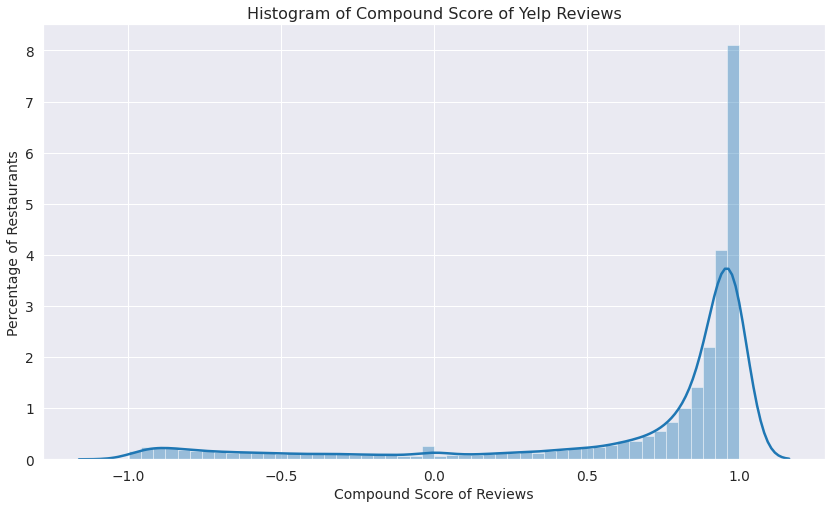

In [ ]:
# Histogram of Compound Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['compound'])
plt.title('Histogram of Compound Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Compound Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

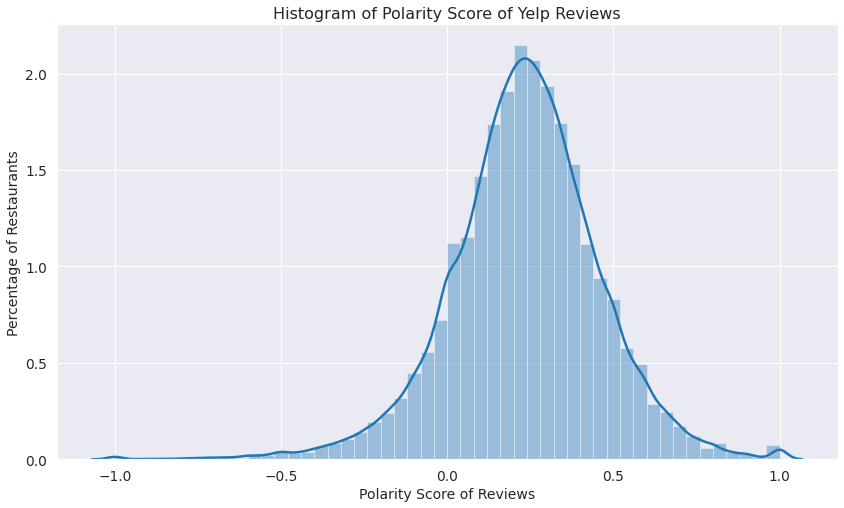

In [ ]:
# Histogram of Polarity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['polarity'])
plt.title('Histogram of Polarity Score of Yelp Reviews', fontsize = 16)
plt.xlabel('Polarity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Percentage of Restaurants')

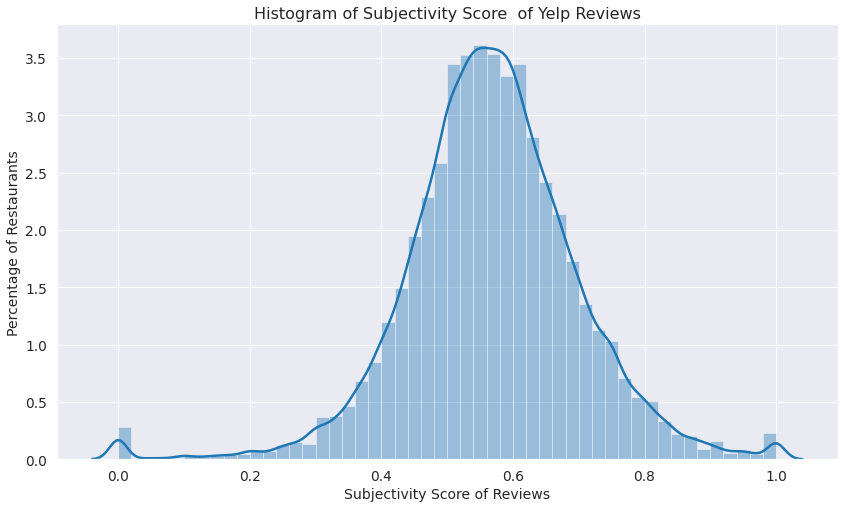

In [ ]:
# Histogram of Subjectivity Score of Yelp Reviews

sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(reviews_final['subjectivity'])
plt.title('Histogram of Subjectivity Score  of Yelp Reviews', fontsize = 16)
plt.xlabel('Subjectivity Score of Reviews', fontsize=14)
plt.ylabel('Percentage of Restaurants', fontsize=14)

In [ ]:
review_df_1.shape

(95000, 20)

In [ ]:
review_df_1.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,96,540,4.635417,34,sansotei serf top notch ramen take reservation...,0.241964,0.487798,0.049,0.916,0.034,-0.1280
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,89,487,4.586207,34,nonexistened service waiter even great u liste...,0.012500,0.518750,0.134,0.798,0.069,-0.7623
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA,628,3662,4.768139,242,might bit unfair review globe early existence ...,0.141872,0.502816,0.049,0.791,0.160,0.9982
3,iKMLsX1Je7P3wAOEc9scDg,0,2011-11-07,0,D2TcNaPqXxDGQ6T0n-vHXw,4,I have been itching to get to Origin for month...,4,YHWsLBS8jzZiPjKHMFOaAA,812,4596,4.588307,347,itching get origin month friend mine gone rave...,0.189253,0.513374,0.038,0.763,0.199,0.9995
4,gl1zQmiA8MUHmLL2wsCdVA,1,2011-01-10,0,ZOBEhxOeMnncqIJFkGumRA,3,Away from the hubbub of the Annex and Little K...,2,YHWsLBS8jzZiPjKHMFOaAA,569,3274,4.650519,245,away hubbub annex little korea sushi joint bec...,0.024278,0.436497,0.037,0.898,0.065,0.9379


In [ ]:

# create a list of our conditions
conditions = [
    (review_df_1['stars'] <= 2.0),
    (review_df_1['stars'] == 3.0 ),
    (review_df_1['stars'] >= 4.0)
    ]

# create a list of the values we want to assign for each condition
values = ['negative', 'neutral', 'positive']

# create a new column and use np.select to assign values to it using our lists as arguments
review_df_1['sentiment'] = np.select(conditions, values)

# display updated DataFrame
review_df_1.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
0,f5O7v_X_jCg2itqacRfxhg,0,2017-10-12,0,kS4hrhEScwB9V5JATYjvVQ,5,Sansotei serves some top notch ramen. They tak...,0,hxqo4NyJFfeOmuoVi--s1A,96,540,4.635417,34,sansotei serf top notch ramen take reservation...,0.241964,0.487798,0.049,0.916,0.034,-0.1280,positive
1,7xA6iSP0Ndn08tpBFQtUKA,0,2017-05-22,0,YDJDfKnx6VpMMo4EBxycGg,1,Non-existened service! The waiter did not eve...,0,FCtoTo9zSH1cSAkascfEHw,89,487,4.586207,34,nonexistened service waiter even great u liste...,0.012500,0.518750,0.134,0.798,0.069,-0.7623,negative
2,SmizR7MLt-558FJJQRBBoQ,1,2011-06-01,1,2Hk7DNwu3rb2jKHaFfPyCA,4,It might be a bit unfair to review Globe so ea...,1,YHWsLBS8jzZiPjKHMFOaAA,628,3662,4.768139,242,might bit unfair review globe early existence ...,0.141872,0.502816,0.049,0.791,0.160,0.9982,positive
3,iKMLsX1Je7P3wAOEc9scDg,0,2011-11-07,0,D2TcNaPqXxDGQ6T0n-vHXw,4,I have been itching to get to Origin for month...,4,YHWsLBS8jzZiPjKHMFOaAA,812,4596,4.588307,347,itching get origin month friend mine gone rave...,0.189253,0.513374,0.038,0.763,0.199,0.9995,positive
4,gl1zQmiA8MUHmLL2wsCdVA,1,2011-01-10,0,ZOBEhxOeMnncqIJFkGumRA,3,Away from the hubbub of the Annex and Little K...,2,YHWsLBS8jzZiPjKHMFOaAA,569,3274,4.650519,245,away hubbub annex little korea sushi joint bec...,0.024278,0.436497,0.037,0.898,0.065,0.9379,neutral


In [ ]:
# # Save combined_reviews into csv file

review_df_1.to_csv("sentiment_reviews.csv")

In [ ]:
combined_reviews = review_df_1.copy()

Topic Modelling

In [ ]:
## Importing Basic Packages
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 50)

# Import NLP Packages
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
from bs4 import BeautifulSoup

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from pprint import pprint
import matplotlib.colors as mcolors

In [ ]:
# Filtering for reviews that have 0.0 scores across 3 metrics: polarity, subjectivity, compound

dropped_reviews = combined_reviews[(combined_reviews.polarity ==0.0) & (combined_reviews.compound==0.0) & (combined_reviews.subjectivity==0.0)]
print(dropped_reviews.shape)
dropped_reviews.sample(5)

(235, 21)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
54399,md4VDsJvyg4pbbGg91EqsA,0,2015-12-03,0,hZA3brQDWzyiBGAibXvWYA,1,"BBQ eel, avocado, cucumber, sesame, unagi sauce.",0,4hSyDnPaseok6Ztmw7vnZw,7,48,6.000000,0,bbq eel avocado cucumber sesame unagi sauce,0.0,0.0,0.0,1.0,0.0,0.0,negative
54737,lkvHG6proAFP8_evKhdxKA,0,2012-06-22,0,hqzkdoTjlXG8Fzftl-rmvg,4,Egg tarts - 4 stars\nCoconut tarts - 4 stars\n...,1,KX__TxaftZYt3Dd3U64t3w,19,92,3.227273,0,egg tart 4 star coconut tart 4 star milk egg t...,0.0,0.0,0.0,1.0,0.0,0.0,positive
84115,zKCXT_ipHEUMoeDNwF1RvA,0,2012-10-14,0,9KCXLrX775z5rOcBl5OXNA,4,Mes amis saoudiens tiennent cette enseigne dep...,0,bi50oVCy6pJBCEXHdhyOFA,66,408,5.196970,0,me amis saoudiens tiennent cette enseigne depu...,0.0,0.0,0.0,1.0,0.0,0.0,positive
84014,aic7eCND9zYr3O4qwV3-mw,0,2013-06-19,0,Vnn3wvRYvrycX7bYT3DnZg,4,La propriétaire des lieux tient à la fois cet ...,1,bi50oVCy6pJBCEXHdhyOFA,48,275,4.750000,0,la propriétaire de lieux tient à la fois cet é...,0.0,0.0,0.0,1.0,0.0,0.0,positive
38914,KVpvE6pOPM9KMvak4HFsNg,0,2015-08-04,0,NkNG---9IkjHV5Ny5VtxNw,5,???????????????\n??????????????????\n????????\...,0,OPKSVYSFuPmtypzCfCSADw,1,130,17.571429,0,,0.0,0.0,0.0,1.0,0.0,0.0,positive


In [ ]:

# Dropping these filtered rows

combined_reviews = combined_reviews.drop(index = dropped_reviews.index)
print(combined_reviews.shape)
combined_reviews.sample(3)

(94765, 21)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment
7392,bGoGHSWHvhftHMWWxQXYbw,0,2012-12-15,0,C7Wry8zwruRR-5vvcixRjg,3,I bought teambuy voucher and we went to this r...,0,Uy7e2cXbyOW6e8RIY5m-bw,103,560,4.375000,40,bought teambuy voucher went restaurant noisy g...,0.307381,0.540476,0.044,0.757,0.200,0.9581,neutral
162,N_2yEZ41g9zDW_gWArFiHw,0,2015-10-08,0,q5SRaNhsJFkJJJKN1gmgfw,4,Really small place to grab ice cream which is ...,0,kBNFdviedCPFWyR-wVaAzw,211,1142,4.401914,86,really small place grab ice cream fine conside...,0.231528,0.526976,0.017,0.713,0.270,0.9971,positive
40987,EzC51yOetmrju2DPP72iRA,0,2017-05-09,0,LiePD_UBX_uqKMVWo32l4A,5,"Very flavourful broth (and not too salty!) , g...",1,E75wAv_5eAZRaNxYz1O-1Q,54,323,5.000000,19,flavourful broth salty generous portion toppin...,0.250000,0.575000,0.000,0.721,0.279,0.9558,positive


In [ ]:

# Converting words in reviews to a list

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list

data = combined_reviews.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['sansotei', 'serves', 'some', 'top', 'notch', 'ramen', 'they', 'take', 'no', 'reservations', 'so', 'my', 'company', 'of', 'five', 'had', 'to', 'wait', 'outside', 'for', 'about', 'half', 'an', 'hour', 'guess', 'its', 'normal', 'for', 'saturday', 'night', 'unlike', 'my', 'favorite', 'ramen', 'place', 'in', 'nyc', 'you', 'can', 'only', 'order', 'whats', 'on', 'menu', 'no', 'deviations', 'or', 'improvisations', 'whatsoever', 'our', 'waitress', 'didnt', 'speak', 'much', 'english', 'and', 'even', 'after', 'writing', 'everything', 'down', 'still', 'managed', 'to', 'make', 'mistake', 'or', 'two', 'but', 'my', 'spicy', 'sesame', 'ramen', 'called', 'tan', 'tan', 'was', 'exceptional', 'can', 'tell', 'you', 'that', 'just', 'the', 'right', 'thickness', 'of', 'broth', 'and', 'taste', 'omg']]


In [ ]:
# Text Processing

import spacy

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)

In [ ]:
# Create Dictionary

id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency

corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5,
                                           random_state=42,
                                           chunksize=250,
                                           passes=5,
                                           alpha='auto',
                                           iterations=10,
                                           per_word_topics=False)

In [ ]:
# Overview of Dominant Topics

pprint(lda_model.print_topics())

[(0,
  '0.045*"place" + 0.043*"food" + 0.030*"great" + 0.019*"really" + '
  '0.019*"service" + 0.017*"price" + 0.013*"love" + 0.013*"time" + '
  '0.012*"definitely" + 0.012*"friendly"'),
 (1,
  '0.028*"table" + 0.022*"friend" + 0.021*"drink" + 0.019*"night" + '
  '0.018*"bar" + 0.016*"dinner" + 0.014*"server" + 0.013*"beer" + '
  '0.013*"restaurant" + 0.013*"seat"'),
 (2,
  '0.030*"order" + 0.025*"chicken" + 0.022*"dish" + 0.022*"fry" + '
  '0.020*"sauce" + 0.017*"taste" + 0.015*"meat" + 0.012*"side" + '
  '0.011*"burger" + 0.011*"hot"'),
 (3,
  '0.024*"coffee" + 0.019*"bread" + 0.016*"sandwich" + 0.016*"cheese" + '
  '0.014*"egg" + 0.014*"tea" + 0.013*"cream" + 0.012*"sweet" + 0.012*"ice" + '
  '0.012*"flavour"'),
 (4,
  '0.022*"order" + 0.019*"time" + 0.013*"give" + 0.013*"food" + 0.012*"wait" + '
  '0.012*"ask" + 0.011*"bad" + 0.010*"never" + 0.009*"service" + '
  '0.009*"minute"')]


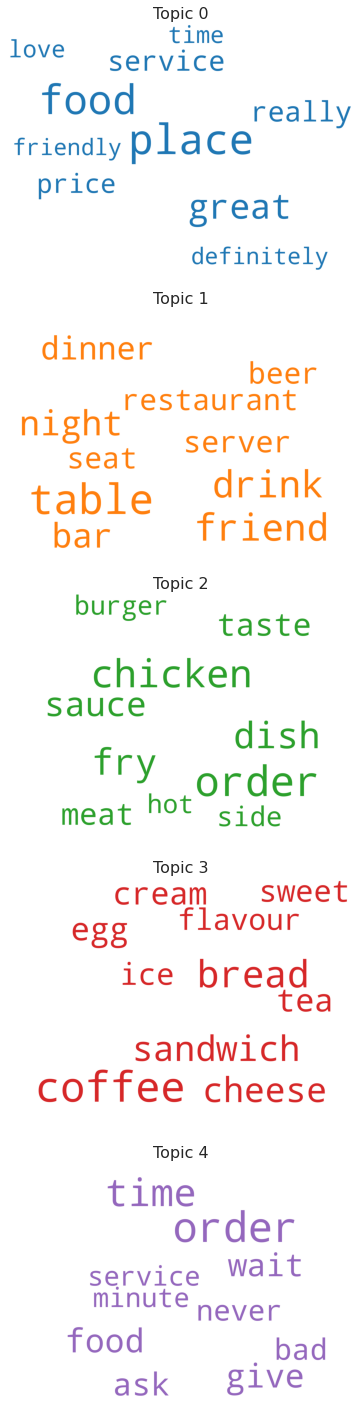

In [ ]:
# Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 1, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 6.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 21.3MB/s 
     |████████████████████████████████| 15.3MB 308kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=34ecfdbc7fdeb3e0dc8e0bf5c333e7a0d6cd1ae291b3e6d09f3e7cc10405fd4a
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

In [ ]:
# 5 topics

import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.111059 -0.208699       1        1  31.024428
4      0.209341 -0.028980       2        1  26.491063
2     -0.156417 -0.083418       3        1  16.395373
1      0.148658  0.252732       4        1  15.853396
3     -0.312641  0.068366       5        1  10.235740, topic_info=        Term          Freq         Total Category  logprob  loglift
19     place  57544.000000  57544.000000  Default  30.0000  30.0000
49     great  35830.000000  35830.000000  Default  29.0000  29.0000
48      food  65855.000000  65855.000000  Default  28.0000  28.0000
18     order  43732.000000  43732.000000  Default  27.0000  27.0000
64     table  16749.000000  16749.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
29       top   2422.117837   6572.074816   Topic5  -5.0851   1.2811
950  perfect   2186.663866   5810.385086   Topic5  -5.1874   1.3020
22     serve   2446.959880  13501.217536   Topic5  -5.0749   0.5714
414    slice   1910.699840   3693.145317   Topic5  -5.3223   1.6203
159   little   1919.481632  14927.284370   Topic5  -5.3177   0.2281

[310 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2286      1  0.999009  affordable
452       1  0.999960      always
1158      1  0.998768     amazing
1158      5  0.001120     amazing
71        1  0.947287        area
...     ...       ...         ...
898       1  0.988670       worth
898       2  0.001340       worth
898       3  0.000853       worth
898       5  0.009137       worth
813       2  0.999847       write

[480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

In [ ]:

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Keywords', 'Text']
print(df_dominant_topic.shape)
df_dominant_topic.head(10)

(94765, 4)


,Document_No,Dominant_Topic,Keywords,Text
0,0,4.0,"order, time, give, food, wait, ask, bad, never...","[serve, top, notch, raman, reservation, compan..."
1,1,4.0,"order, time, give, food, wait, ask, bad, never...","[existened, service, waiter, great, listen, or..."
2,2,0.0,"place, food, great, really, service, price, lo...","[bit, unfair, review, early, existence, feel, ..."
3,3,2.0,"order, chicken, dish, fry, sauce, taste, meat,...","[itch, origin, month, friend, rave, food, dug,..."
4,4,4.0,"order, time, give, food, wait, ask, bad, never...","[joint, become, relatively, quiet, stretch, si..."
5,5,4.0,"order, time, give, food, wait, ask, bad, never...","[ever, drive, high, street, level, sign, adver..."
6,6,0.0,"place, food, great, really, service, price, lo...","[family, sole, provider, york, famous, dreesen..."
7,7,4.0,"order, time, give, food, wait, ask, bad, never...","[first, admit, roncesvalle, village, well, fri..."
8,8,1.0,"table, friend, drink, night, bar, dinner, serv...","[anymore, former, become, second, enough, almo..."
9,9,2.0,"order, chicken, dish, fry, sauce, taste, meat,...","[food, fashion, trend, couple, year, new, ingr..."


In [ ]:
# Append new columns onto reviews dataset

df_dominant_topic['Text_Chunks'] = df_dominant_topic['Text']
extra_feature_columns = df_dominant_topic[['Dominant_Topic', 'Keywords', 'Text_Chunks']]
final_reviews = pd.concat([combined_reviews,extra_feature_columns], axis=1).reindex(combined_reviews.index)
final_reviews.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment,Dominant_Topic,Keywords,Text_Chunks
0,f5O7v_X_jCg2itqacRfxhg,0.0,2017-10-12,0.0,kS4hrhEScwB9V5JATYjvVQ,5.0,Sansotei serves some top notch ramen. They tak...,0.0,hxqo4NyJFfeOmuoVi--s1A,96.0,540.0,4.635417,34.0,sansotei serf top notch ramen take reservation...,0.241964,0.487798,0.049,0.916,0.034,-0.1280,positive,4.0,"order, time, give, food, wait, ask, bad, never...","[serve, top, notch, raman, reservation, compan..."
1,7xA6iSP0Ndn08tpBFQtUKA,0.0,2017-05-22,0.0,YDJDfKnx6VpMMo4EBxycGg,1.0,Non-existened service! The waiter did not eve...,0.0,FCtoTo9zSH1cSAkascfEHw,89.0,487.0,4.586207,34.0,nonexistened service waiter even great u liste...,0.012500,0.518750,0.134,0.798,0.069,-0.7623,negative,4.0,"order, time, give, food, wait, ask, bad, never...","[existened, service, waiter, great, listen, or..."
2,SmizR7MLt-558FJJQRBBoQ,1.0,2011-06-01,1.0,2Hk7DNwu3rb2jKHaFfPyCA,4.0,It might be a bit unfair to review Globe so ea...,1.0,YHWsLBS8jzZiPjKHMFOaAA,628.0,3662.0,4.768139,242.0,might bit unfair review globe early existence ...,0.141872,0.502816,0.049,0.791,0.160,0.9982,positive,0.0,"place, food, great, really, service, price, lo...","[bit, unfair, review, early, existence, feel, ..."
3,iKMLsX1Je7P3wAOEc9scDg,0.0,2011-11-07,0.0,D2TcNaPqXxDGQ6T0n-vHXw,4.0,I have been itching to get to Origin for month...,4.0,YHWsLBS8jzZiPjKHMFOaAA,812.0,4596.0,4.588307,347.0,itching get origin month friend mine gone rave...,0.189253,0.513374,0.038,0.763,0.199,0.9995,positive,2.0,"order, chicken, dish, fry, sauce, taste, meat,...","[itch, origin, month, friend, rave, food, dug,..."
4,gl1zQmiA8MUHmLL2wsCdVA,1.0,2011-01-10,0.0,ZOBEhxOeMnncqIJFkGumRA,3.0,Away from the hubbub of the Annex and Little K...,2.0,YHWsLBS8jzZiPjKHMFOaAA,569.0,3274.0,4.650519,245.0,away hubbub annex little korea sushi joint bec...,0.024278,0.436497,0.037,0.898,0.065,0.9379,neutral,4.0,"order, time, give, food, wait, ask, bad, never...","[joint, become, relatively, quiet, stretch, si..."
5,OR6iRk0vrMzE-1gLg-WYrw,4.0,2010-11-22,2.0,fWdhtaQld99jXB-N9yu1tg,2.0,If you've ever driven by High Park on Bloor st...,9.0,YHWsLBS8jzZiPjKHMFOaAA,203.0,1171.0,4.707317,77.0,youve ever driven high park bloor street seen ...,0.164747,0.655888,0.049,0.788,0.163,0.9821,negative,4.0,"order, time, give, food, wait, ask, bad, never...","[ever, drive, high, street, level, sign, adver..."
6,qAg8GkN9rforFWmGxBqVqA,2.0,2011-07-11,0.0,t98usw-bvob9JqMJPvvnsw,3.0,Uncle Betty's is a family foodie heaven: the s...,3.0,YHWsLBS8jzZiPjKHMFOaAA,541.0,3089.0,4.693161,219.0,uncle bettys family foodie heaven sole toronto...,0.305908,0.564755,0.003,0.805,0.192,0.9990,neutral,0.0,"place, food, great, really, service, price, lo...","[family, sole, provider, york, famous, dreesen..."
7,VhQXJteVrG3L-wq8HlYFqw,1.0,2012-01-13,0.0,0RqkBJegJpH7thxPTL30NA,4.0,I am the first to admit that I don't know Ronc...,2.0,YHWsLBS8jzZiPjKHMFOaAA,656.0,3622.0,4.511450,268.0,first admit dont know roncesvalles village wel...,0.182268,0.523559,0.034,0.787,0.179,0.9989,positive,4.0,"order, time, give, food, wait, ask, bad, never...","[first, admit, roncesvalle, village, well, fri..."
8,CN5nuUQod0f8g3oh99qq0w,3.0,2011-04-02,0.0,TiicMquFOQFF7_-SNnyBww,4.0,Can I get a Whopper? Not anymore...\n\nA forme...,5.0,YHWsLBS8jzZiPjKHMFOaAA,691.0,3857.0,4.507868,308.0,get whopper anymore former burger king bathurs...,0.180432,0.545145,0.022,0.828,0.150,0.9987,positive,1.0,"table, friend, drink, night, bar, dinner, serv...","[anymore, former, become, second, enough, almo..."
9,yTWSFoGjkK6pl7kJm8f0Dg,1.0,2011-01-17,0.0,OV_95Q6-zyRAn2hGDAXX3A,2.0,"Food, like fashion, has a lot to do with trend...",8.0,YHWsLBS8jzZiPjKHMFOaAA,580.0,3293.0,4.590136,248.0,food like fashion lot trend every couple year ...,0.193514,0.502000,0.035,0.849,0.117,0.9937,negative,2.0,"order, chicken, dish, fry, sauce

In [ ]:
# Save final_reviews into csv file

final_reviews.to_csv("final_reviews.csv")

In [ ]:
%ls

Dataset_User_Agreement.pdf  sentiment_reviews.csv
final_reviews.csv           yelp_academic_dataset_business.json
kaggle.json                 yelp_academic_dataset_checkin.json
Negative_Reviews.png        yelp_academic_dataset_review.json
negative_words.csv          yelp_academic_dataset_tip.json
Positive_Reviews.png        yelp_academic_dataset_user.json
positive_words.csv


In [ ]:
final_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,word_count,char_count,avg_word_len,stopword_count,cleaned_text,polarity,subjectivity,neg,neu,pos,compound,sentiment,Dominant_Topic,Keywords,Text_Chunks
0,f5O7v_X_jCg2itqacRfxhg,0.0,2017-10-12,0.0,kS4hrhEScwB9V5JATYjvVQ,5.0,Sansotei serves some top notch ramen. They tak...,0.0,hxqo4NyJFfeOmuoVi--s1A,96.0,540.0,4.635417,34.0,sansotei serf top notch ramen take reservation...,0.241964,0.487798,0.049,0.916,0.034,-0.1280,positive,4.0,"order, time, give, food, wait, ask, bad, never...","[serve, top, notch, raman, reservation, compan..."
1,7xA6iSP0Ndn08tpBFQtUKA,0.0,2017-05-22,0.0,YDJDfKnx6VpMMo4EBxycGg,1.0,Non-existened service! The waiter did not eve...,0.0,FCtoTo9zSH1cSAkascfEHw,89.0,487.0,4.586207,34.0,nonexistened service waiter even great u liste...,0.012500,0.518750,0.134,0.798,0.069,-0.7623,negative,4.0,"order, time, give, food, wait, ask, bad, never...","[existened, service, waiter, great, listen, or..."
2,SmizR7MLt-558FJJQRBBoQ,1.0,2011-06-01,1.0,2Hk7DNwu3rb2jKHaFfPyCA,4.0,It might be a bit unfair to review Globe so ea...,1.0,YHWsLBS8jzZiPjKHMFOaAA,628.0,3662.0,4.768139,242.0,might bit unfair review globe early existence ...,0.141872,0.502816,0.049,0.791,0.160,0.9982,positive,0.0,"place, food, great, really, service, price, lo...","[bit, unfair, review, early, existence, feel, ..."
3,iKMLsX1Je7P3wAOEc9scDg,0.0,2011-11-07,0.0,D2TcNaPqXxDGQ6T0n-vHXw,4.0,I have been itching to get to Origin for month...,4.0,YHWsLBS8jzZiPjKHMFOaAA,812.0,4596.0,4.588307,347.0,itching get origin month friend mine gone rave...,0.189253,0.513374,0.038,0.763,0.199,0.9995,positive,2.0,"order, chicken, dish, fry, sauce, taste, meat,...","[itch, origin, month, friend, rave, food, dug,..."
4,gl1zQmiA8MUHmLL2wsCdVA,1.0,2011-01-10,0.0,ZOBEhxOeMnncqIJFkGumRA,3.0,Away from the hubbub of the Annex and Little K...,2.0,YHWsLBS8jzZiPjKHMFOaAA,569.0,3274.0,4.650519,245.0,away hubbub annex little korea sushi joint bec...,0.024278,0.436497,0.037,0.898,0.065,0.9379,neutral,4.0,"order, time, give, food, wait, ask, bad, never...","[joint, become, relatively, quiet, stretch, si..."
